# BFS(너비우선탐색)

* 너비우선탐색이란 문제의 최단 경로를 찾는 것이다.
* 적용가능한 예로 최소환승, 맞춤법 검사 등이 있다.
* 너비우선탐색을 하기위해서는 다음과 같은 절차가 필요하다
 * 문제를 그래프로 모형화한다.(그래프에 관한 내용은 datastructure에)
 * 너비우선탐색으로 문제를 푼다.

### 페이스북 예제(BFS 적용)
* 페이스북 친구 중에 망고 판매상을 찾으려고 한다.
* 친구 목록은 간선으로 나타낸다.(실제로 친구관계는 상호관계지만 한쪽 방향으로만 생각한다.)
* 먼저 자신의 친구들을 찾아본 후(가장 가까운 거리), 자신의 친구들의 친구들을 찾아나간다.(다음으로 가까운 거리)
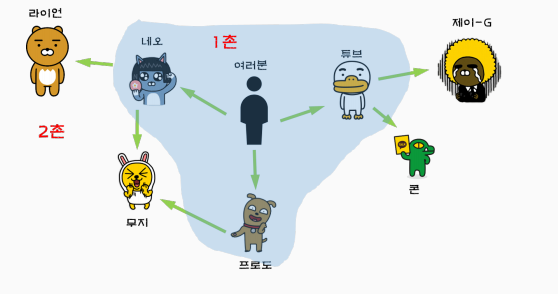

In [3]:
from collections import deque

graph = {}
graph["You"] = ["Neo", "Tube", "Frodo"]
graph["Neo"] = ["Muzi", "Ryan"]
graph["Tube"] = ["Jay-G", "Con"]
graph["Frodo"] = ["Muzi"]
graph["Muzi"] = []
graph["Ryan"] = []
graph["Jay-G"] = []
graph["Con"] = []
graph

{'You': ['Neo', 'Tube', 'Frodo'],
 'Neo': ['Muzi', 'Ryan'],
 'Tube': ['Jay-G', 'Con'],
 'Frodo': ['Muzi'],
 'Muzi': [],
 'Ryan': [],
 'Jay-G': [],
 'Con': []}

In [4]:
def is_mango_seller(person):
    if person[-1] == 'G':
        return True
    else:
        return False

In [9]:
def search(name):
    search_queue = deque()
    search_queue += graph[name]
    searched = []
    while search_queue:
        print(search_queue)
        person = search_queue.popleft()
        if person not in searched:
            if is_mango_seller(person) == True:
                print("망고상인을 찾았다! 망고상인은", person)
                return True
            else:
                search_queue += graph[person]
                searched.append(person)
        return False
search("You")

deque(['Neo', 'Tube', 'Frodo'])
deque(['Tube', 'Frodo', 'Muzi', 'Ryan'])
deque(['Frodo', 'Muzi', 'Ryan', 'Jay-G', 'Con'])
deque(['Muzi', 'Ryan', 'Jay-G', 'Con', 'Muzi'])
deque(['Ryan', 'Jay-G', 'Con', 'Muzi'])
deque(['Jay-G', 'Con', 'Muzi'])
망고상인을 찾았다! 망고상인은 Jay-G


True

* 망고 판매상을 찾기 위해 네트워크 전체를 탐색한다는 것은 모든 정점을 따라서 움직인다는 뜻이다. 즉, BFS는 완전 탐색이며 실행시간은 최소한 O(간선의 개수)가 된다.
* 그리고 탐색할 사람을 저장하는 큐에 사람을 추가하는 데는 상수 시간, O(1)이 걸리므로 사람의 수는 전체 정점의 수 V이므로 O(V)의 시간이 걸리게 된다.
* 따라서 너비 우선 탐색은 O(사람의 수 + 간선의 개수)가 되고 보통 O(V + E)로 표기한다.(V는 정점의 개수, E는 간선의 개수)

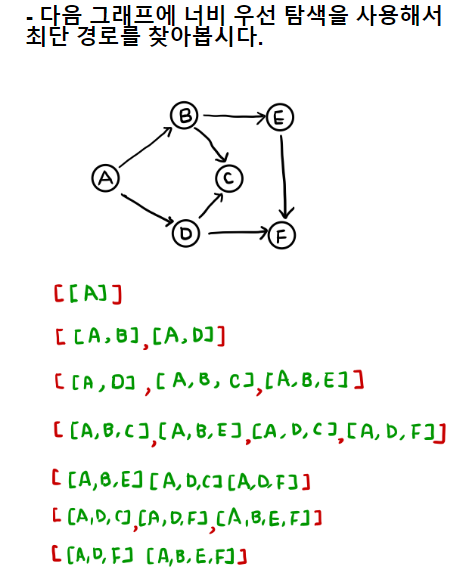

In [10]:
graph = {}
graph["A"] = ["B","D"]
graph["B"] = ["C","E"]
graph["C"] = []
graph["D"] = ["C","F"]
graph["E"] = ["F"]
graph["F"] = []
graph

{'A': ['B', 'D'],
 'B': ['C', 'E'],
 'C': [],
 'D': ['C', 'F'],
 'E': ['F'],
 'F': []}

In [13]:
def bfs(graph, start, end):
    search_queue = deque()
    search_queue.append([start])
    searched = []
    while search_queue:
        path = search_queue.popleft()
        node = path[-1]
        if node not in searched:
            if node == end:
                return path
            else:
                for item in graph[node]:
                    newpath = path[:]
                    newpath.append(item)
                    search_queue.append(newpath)
                searched.append(node)
    return False

print(bfs(graph, "A", "F"))
print(bfs(graph, "C", "F"))

['A', 'D', 'F']
False
